In [1]:
from env import *
from fonctions import *
import numpy as np
import gurobipy as gp
from gurobipy import GRB

### Test generator

In [2]:
env = Env(10,10,0.6,0.2,[0.1,0.2,0.3,0.4])

In [3]:
cases=env.reset()

In [4]:
cases[:,:,0]

array([[3, 3, 0, 3, 4, 0, 3, 3, 0, 3],
       [2, 2, 0, 3, 1, 0, 0, 2, 3, 4],
       [0, 4, 0, 0, 0, 1, 4, 3, 4, 3],
       [0, 3, 4, 3, 3, 4, 0, 2, 4, 3],
       [0, 4, 3, 4, 0, 3, 2, 3, 4, 3],
       [0, 3, 2, 3, 2, 2, 4, 3, 0, 2],
       [0, 4, 4, 4, 3, 3, 0, 3, 4, 1],
       [3, 0, 4, 0, 0, 0, 3, 2, 2, 4],
       [0, 4, 2, 3, 0, 0, 0, 3, 3, 1],
       [2, 1, 3, 3, 3, 4, 0, 2, 3, 2]])

In [5]:
env.reward

array([[  -3,   -3,    0,   -3,   -4,    0,   -3,   -3,    0,   -3],
       [  -2,   -2,    0,   -3,   -1,    0,    0,   -2,   -3,   -4],
       [   0,   -4,    0,    0,    0,   -1,   -4,   -3,   -4,   -3],
       [   0,   -3,   -4,   -3,   -3,   -4,    0,   -2,   -4,   -3],
       [   0,   -4,   -3,   -4,    0,   -3,   -2,   -3,   -4,   -3],
       [   0,   -3,   -2,   -3,   -2,   -2,   -4,   -3,    0,   -2],
       [   0,   -4,   -4,   -4,   -3,   -3,    0,   -3,   -4,   -1],
       [  -3,    0,   -4,    0,    0,    0,   -3,   -2,   -2,   -4],
       [   0,   -4,   -2,   -3,    0,    0,    0,   -3,   -3,   -1],
       [  -2,   -1,   -3,   -3,   -3,   -4,    0,   -2,   -3, 1000]])

### Test value iteration

In [6]:
nb,v,policy=value_iteration(env,0.9,max_iteration=2000)

In [7]:
dict_action={0:"O",1:"S",2:"W",3:"E"}

In [8]:
policy

array([[1., 1., 0., 1., 1., 0., 3., 1., 0., 1.],
       [3., 1., 0., 3., 1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 1., 3., 1., 1., 1.],
       [0., 3., 3., 3., 3., 1., 0., 1., 1., 1.],
       [0., 3., 3., 1., 0., 3., 1., 1., 3., 1.],
       [0., 3., 3., 3., 3., 3., 3., 1., 0., 1.],
       [0., 3., 3., 3., 3., 0., 0., 3., 1., 1.],
       [0., 0., 0., 0., 0., 0., 3., 1., 1., 1.],
       [0., 3., 0., 2., 0., 0., 0., 1., 3., 1.],
       [3., 0., 0., 0., 2., 2., 0., 3., 3., 0.]])

In [9]:
v

array([[159.04409295, 171.00517332,   0.        , -12.09704443,
        -10.52201343,   0.        , 302.17819478, 331.98903776,
          0.        , 361.70690621],
       [174.50785129, 196.65800012,   0.        , -10.69150495,
         -9.99700309,   0.        ,   0.        , 366.36715333,
        391.13715201, 409.86419285],
       [  0.        , 222.95333347,   0.        ,   0.        ,
          0.        , 341.30030314, 370.16505691, 415.44587332,
        437.75928606, 464.26044633],
       [  0.        , 245.21445237, 275.54959868, 309.96072001,
        347.73413334, 392.37244324,   0.        , 458.21220953,
        488.51712477, 527.12133872],
       [  0.        , 252.07989317, 281.21522953, 308.76600154,
          0.        , 431.21644127, 470.53669739, 517.91656775,
        538.00365231, 602.05650181],
       [  0.        , 261.80831278, 297.91523037, 346.04810607,
        393.75157109, 460.41668213, 526.83343973, 592.06465083,
          0.        , 671.1738909 ],
       [  

### Test visualisation de politique

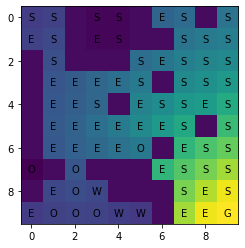

In [10]:
visu_policy(v,policy,dict_action,cases)

### Test programmation lineaire de politique mixte

In [11]:
results = dual_pl_mono(env,0.9)

Academic license - for non-commercial use only - expires 2021-01-25
Using license file /home/yuhan/gurobi.lic


In [12]:
p=dual_pl_mono(env,0.9)

In [13]:
print(p.shape)

(10, 10, 4)


In [14]:
pn=normalise(p)

In [15]:
pd=get_a_policy(pn)

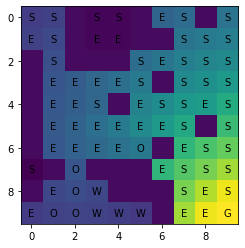

In [16]:
visu_policy(v,pd,dict_action,cases)